<img src="https://github.com/alan-barzilay/NLPortugues/blob/master/imagens/logo_nlportugues.png?raw=true"  style="height:65%" align="right">


# Lista 3 - Embeddings 
**Nome: Augusto Cesar de Camargo Neto**

**Numero Usp: 11891023**









______________




O objetivo desta lista é fazer com que vocês treinem um modelo de análise de sentimentos utilizando um embedding. O modelo final será criado na seção "montando o modelo", mas até lá vamos passar pelas seguintes etapas:  
 - Importando os dados como um dataframe
 - Pré Processamento
 - Separando em teste e treino
 - Tokenizando

 
Após montar e treinar seu modelo você tambem poderá fazer uma questão extra para ganhar nota extra nessa lista, deixar de fazer esse exercicio não prejudicará sua nota.



In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

from unidecode import unidecode

In [14]:
tf.__version__

'2.3.0'

### Importando os dados como um dataframe

Para esta lista nós utilizaremos o dataset **B2W-Reviews01** que consiste em avaliações de mais de 130k compras online no site Americanas.com e [esta disponivel no github](https://github.com/b2wdigital/b2w-reviews01) sob a licensa CC BY-NC-SA 4.01.

In [15]:
b2wCorpus = pd.read_csv("data/b2w-10k.csv", encoding='utf-8')
for i, row in b2wCorpus.iterrows():
    ifor_val = unidecode(row['review_text']).lower()
    b2wCorpus.at[i,'review_text']= ifor_val
b2wCorpus.head()

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,4,Yes,estou contente com a compra entrega rapida o u...,1958,F,RJ,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"por apenas r$1994.20,eu consegui comprar esse ...",1996,M,SC,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,supera em agilidade e praticidade outras panel...,1984,M,SP,NaN,NaN,NaN,NaN,NaN
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,meu filho amou! parece de verdade com tantos d...,1985,F,SP,NaN,NaN,NaN,NaN,NaN
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"a entrega foi no prazo, as americanas estao de...",1994,M,MG,NaN,NaN,NaN,NaN,NaN


In [16]:
b2wCorpus["review_text"]

0       estou contente com a compra entrega rapida o u...
1       por apenas r$1994.20,eu consegui comprar esse ...
2       supera em agilidade e praticidade outras panel...
3       meu filho amou! parece de verdade com tantos d...
4       a entrega foi no prazo, as americanas estao de...
                              ...                        
9994    celular muito rapido, com processador e armaze...
9995    achei o produto muito fragil, o material veio ...
9996    uma porcaria pois n recebi n recomendo pra nin...
9997    maquina excelente,super pratica. recomendo.ent...
9998    agradeco pelo compromisso, obrigado. ,...........
Name: review_text, Length: 9999, dtype: object


### Pré-processamento
Seria util nos livrarmos das colunas que não são relevantes para o nosso problema e tambem verificar se não tem nada de esquisito nas colunas que vamos utilizar. 
Por exemplo, se fossemos utilizar a coluna "reviewer_gender" nós precisariamos nos livrar desses valores esquisitos:

In [17]:
b2wCorpus["reviewer_gender"].value_counts()

M                                                                         5033
F                                                                         4624
Ocorrência: Z-Devolução Em Andamento Ao Cd de São Paulo 22/12/17 16:12       1
1970                                                                         1
                                                                             1
Name: reviewer_gender, dtype: int64

## <font color='blue'>Questão 1 </font>

a) Selecione apenas as colunas relevantes: "review_text" e "recommend_to_a_friend". 

b) Converta a coluna "review_text" de uma coluna de `str` para uma coluna de `int`:

- "Yes"-> 1
- "No" -> 0


In [18]:
b2wCorpus= b2wCorpus[["review_text", "recommend_to_a_friend"]]
b2wCorpus['recommend_to_a_friend'].replace({'No': 0, 'Yes': 1}, inplace = True)
b2wCorpus.head()
b2wCorpus["recommend_to_a_friend"].value_counts()

1    7451
0    2548
Name: recommend_to_a_friend, dtype: int64

### Separando em teste e treino
## <font color='blue'>Questão 2 </font>

Agora com o dataset já pré-processado, separe o em 2 partes, um conjunto de teste e um conjunto de treino. Novamente você pode utilizar a função [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do Scikit-Learn como na lista passada.

In [19]:
x = b2wCorpus[['review_text']].values
y = b2wCorpus[['recommend_to_a_friend']].values

print(b2wCorpus.recommend_to_a_friend.value_counts()/ b2wCorpus.shape[0])

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=RANDOM_SEED)

1    0.745175
0    0.254825
Name: recommend_to_a_friend, dtype: float64


### Tokenizando

Para alimentarmos os reviews a camada de embedding nós precisamos quebrar cada review em uma serie de tokens. Existem diversas maneiras de se realizar isso e poderiamos até mesmo usar outras bibliotecas como o spaCy. 

Por exemplo, o objeto [`Tokenizer`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer) oferece um método `tokenize` para quebrar as palavras em tokens individuais ao mesmo tempo que filtra caracteres indesejados (por default os caracteres filtrados são: !"#$\%&()*+,-./:;<=>?@[\\]^_\`{|}~\t\n).


Para essa lista utilizaremos a camada [`TextVectorization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization) para automaticamente passar os reviews para caixa-baixa, extrair caracteres especiais e tokenizar as palavras de maneira a serem passadas para a camada de embedding. Ao tornarmos a etapa de tokenização uma camada de rede neural nós podemos incluir esse processamento dos reviews no proprio modelo.


## <font color='blue'>Questão 3 </font>
Utilizando a camada `TextVectorization` tokenize os inputs.
Declare a camada e então chame a função `adapt()` para adequar o seu vocabulário aos reviews.

Não se esqueça de se certificar que todas os reviews tenham o mesmo comprimento, seja por meio do uso de padding, truncamento ou uma mistura dos dois. Plotamos um histograma do comprimento dos reviews para lhe auxiliar nessa decisão.

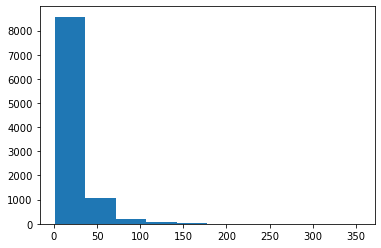

In [20]:
plt.hist([len(linha.split()) for linha in b2wCorpus["review_text"]])
plt.show()

In [21]:
vectorize_layer = TextVectorization(
                                        max_tokens=12623,
                                        standardize='lower_and_strip_punctuation',
                                        split='whitespace',
                                        output_mode='int',
                                        pad_to_max_tokens=True
                                        )

vectorize_layer.adapt(x_train)
vocab_size = len(vectorize_layer.get_vocabulary())

### Montando o modelo

Agora vamos juntar a camada do tokenizador a nossa camada [Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding) e definir o resto de nosso modelo.

##  <font color='blue'>Questão 3 </font>

Defina seu modelo.

Como analise de sentimentos pode ser visto como um problema de classificação, é interessante também registrar algumas métricas como acurácia `metrics=["acc"]` .

Seu modelo deve começar com a seguinte estrutura:
 - Camada de Input
 - Camada de Tokenização
 - Camada de Embedding
 
Já definimos as camadas seguintes da rede por você.
 
Atenção a dimensão do input da camada de embedding, lembre se que < OOV > e < PAD > possuem seus próprios tokens.


In [22]:
model = tf.keras.Sequential([
    ############ Seu código aqui##################
    tf.keras.Input(shape=(1, ),
                   dtype=tf.string),
    vectorize_layer,
    tf.keras.layers.Embedding(input_dim=vocab_size + 2,
                              output_dim = 32),
    ##############################################
    # Conv1D + global max pooling
    layers.Conv1D(128, 7, padding='valid', activation='relu', strides=3),
    layers.Conv1D(128, 7, padding='valid', activation='relu', strides=3),
    layers.GlobalMaxPooling1D(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid'),
])


### Treinando e avaliando seu modelo

##  <font color='blue'>Questão 4 </font>

Com seu modelo definido, treine e avalie sua performance no conjunto de testes.



In [ ]:
# Seu código aquimodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train,  y_train, epochs=25, batch_size=32, validation_data=(x_val, y_val))    
score = model.evaluate(x_val, y_val)
print(score)

Epoch 1/25
250/250 [==============================] - 3s 11ms/step - loss: 0.3787 - accuracy: 0.8334 - val_loss: 0.2844 - val_accuracy: 0.8770
Epoch 2/25
250/250 [==============================] - 3s 11ms/step - loss: 0.1793 - accuracy: 0.9394 - val_loss: 0.2379 - val_accuracy: 0.9085
Epoch 3/25
250/250 [==============================] - 3s 11ms/step - loss: 0.0819 - accuracy: 0.9777 - val_loss: 0.3233 - val_accuracy: 0.8895
Epoch 4/25
250/250 [==============================] - 3s 10ms/step - loss: 0.0366 - accuracy: 0.9902 - val_loss: 0.4766 - val_accuracy: 0.8770
Epoch 5/25
250/250 [==============================] - 3s 11ms/step - loss: 0.0165 - accuracy: 0.9951 - val_loss: 0.5941 - val_accuracy: 0.8770
Epoch 6/25
250/250 [==============================] - 3s 11ms/step - loss: 0.0101 - accuracy: 0.9971 - val_loss: 0.6311 - val_accuracy: 0.8825
Epoch 7/25
250/250 [==============================] - 3s 11ms/step - loss: 0.0052 - accuracy: 0.9989 - val_loss: 0.7416 - val_accuracy: 0.8775

##  <font color='green'>Questão Extra </font>
Valendo pontos extras, você não vai ser prejudicado se deixar de faze-la

### Vizualizando o embedding
Agora que temos um embedding treinado em nossa tarefa de analise de sentimentos, podemos tentar vizualisar este embedding. O [embedding projector](https://projector.tensorflow.org/) nos permite visualiza-los de maneira mais intuitiva.

Para carregar seu próprio embedding você precisará fornecer 2 arquivos, um com os embeddings propriamente ditos e outro com os métadados (no nosso caso, um string que representa a palavra). 

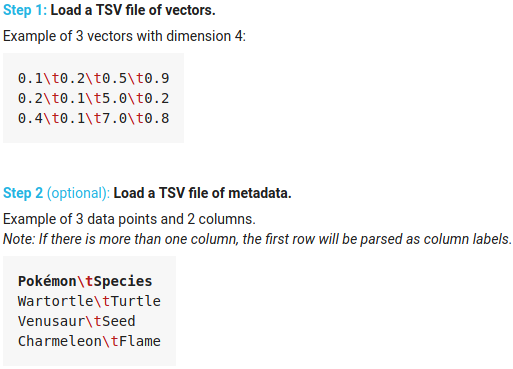

Esse [guia](https://www.tensorflow.org/tensorboard/tensorboard_projector_plugin) pode ser util para entender melhor como extrair essas informações.

In [ ]:
# or access the embedding layer through the constructed model 
# first `0` refers to the position of embedding layer in the `model`
embeddings = model.layers[0].get_weights()[0]

# `embeddings` has a shape of (num_vocab, embedding_dim) 

# `word_to_index` is a mapping (i.e. dict) from words to their index, e.g. `love`: 69
words_embeddings = {w:embeddings[idx] for w, idx in word_to_index.items()}

# now you can use it like this for example
print(words_embeddings['love'])

Procure por palavras com conotações tradicionalmente positivas e negativas, elas estão proximas ou distantes?
Usando a visualização PCA, você consegue notar alguma característica interessante sobre como as palavras estão distribuidas nesse espaço?


**<font color='red'> Sua resposta aqui </font>**